#PROJECT 3 - GRAPH THEORY - MINIMUM CUT
KARGER ALGORITHM IMPLEMENTATION
NAIVE ALGORITHM FOR MINIMUM CUT

IMPLEMTENTAÇÃO DO ALGORITMO DE CORTE MÍNIMO DE KARGER
1) escolho uma aresta aleatória
2) faço a contração dessa aresta, criando um supervértice (Cada contração aumentará esse supervértice ou criará um novo supervértice)
3) faço esse procedimento acima até ter apenas 1 aresta ou 2 vértices (vertice orignal+supervertice ou supervertice + supervertice)

Como conto os cortes?

Os vértices que contém duas ou mais arestas vão ser levados para um supervértice por uma delas, mas não pelas outras. Estas que sobram serão as somadas para o corte ao final


In [1]:
# #Para abrir no de Maria
from google.colab import drive
drive.mount('/content/drive')

# Para abrir no de Ingrid
# colocar o arquivo teste

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import random
import copy
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
class Graph:
    def __init__(self, archive):
        self.nvertex, self.adjmatrix, self.adjlist, self.arestas, self.vertices = self.openFile(archive)

    def openFile(self, archive):
        with open(archive, 'r') as file:
            nvertex = int(file.readline())
            line = file.readlines()
            adjmatrix = [list(map(lambda x: int(x), l.split())) for l in line[0:]]
            adjlist = [[] for _ in range(nvertex)]

            for i in range(nvertex):
                for j in range(nvertex):
                    if adjmatrix[i][j] == 1:
                        adjlist[i].append(j)

         # preenchendo a lista de arestas
        arestas = []
        for k in range(nvertex):
            for z in range(nvertex):
                if adjmatrix[k][z] == 1 and (z+1,k+1) not in arestas:
                    arestas.append((k+1,z+1))
        print(arestas)

        # criando a lista de vertices
        vertices = []
        for h in range(nvertex):
            vertices.append(h+1)
        print("\ARESTAS:")
        print(vertices)

        return nvertex, adjmatrix, adjlist, arestas, vertices

    def printMatrix(self):
        print("Adjacency Matrix:")
        print(" ", np.arange(0, len(self.adjmatrix), 1))
        for i, l in enumerate(self.adjmatrix):
            print(f'{i} |{" ".join(map(str, l))}')

    def printList(self):
        print("\nAdjacency List:")
        for i, ladj in enumerate(self.adjlist):
            print(f'{i}: {"-> ".join(map(str, ladj))}')



In [109]:
class Karger:

    def __init__(self, adj_list):
        self.adjlist = adj_list
        self.max = len(self.adjlist) # maior vértice
        self.edges = {}
        self.cortes = []

    def Edges(self): # obtendo todas as arestas do grafo
        edges = []
        for i in range(0, len(self.adjlist)):
            for j in self.adjlist[i]:
                if [j,i] not in edges: #nao quero que seja uma tupla, pois nao poderei modificar
                    edges.append([i,j])

        for i in range(len(edges)):
            self.edges[i] = edges[i]

        return self.edges

    def deletarDuplicadas(self, edges, unused_edges, notused):
        arestas_visitadas = set()  # Conjunto para armazenar arestas já visitadas

        for key, edge in list(edges.items()):  # Usamos list() para criar uma cópia dos itens do dicionário para iterar sobre eles
            # Ordenamos a aresta para garantir consistência na comparação
            aresta_ordenada = tuple(sorted(edge))

            if aresta_ordenada in arestas_visitadas:
                # Se a aresta já foi visitada, ela é repetida
                #entao deletar ela e seu index e guardar ela em nao usadas
                del edges[key]
                unused_edges.remove(key)
                notused.append(key)

            else:
                # Se a aresta não foi visitada antes, adicionamos ao conjunto de arestas visitadas
                arestas_visitadas.add(aresta_ordenada)


    def karger(self, n_iter):
        interacaousada = n_iter
        minCut = []
        corteminimo = []

        while (n_iter > 0):
            edgescopy = copy.deepcopy(self.edges)
            unused_indexes = list(edgescopy.keys())
            supervertices = {}
            not_used = []
            corte = 0
            arestas_usadas = []

            while(len(edgescopy)>1): # enquanto houver mais de 2 vértice
                u_index = None
                v_index = None
                chosen_index = random.choice(unused_indexes)
                chosen = edgescopy[chosen_index]
                arestas_usadas.append(self.edges[chosen_index])

                u, v = chosen

                #REMOVENDO o index usados para não serem sorteados novamente
                #deixando apenas os indices das aretas não usadas para rastrear depois
                unused_indexes.remove(chosen_index)

                #removendo a aresta usada
                for key, edge in list(edgescopy.items()):
                    if chosen == edge:
                        del edgescopy[key]
                        break

                #juntar u e v como a superaresta
                for key, edge in list(edgescopy.items()):
                    for i in range(len(edge)):
                        if edge[i] == v:
                            edge[i] = u

                #verificar se nas arestas modificadss, houve uma duplicação de aresta
                self.deletarDuplicadas(edgescopy,unused_indexes, not_used)

                #O CODIGO ABAIXO CONSTROI OS SUPERVÉRTICES -----------------------------
                # Verifica se ui e vi está em algum supervértice existente, e guarda seu index
                u, v = self.edges[chosen_index]
                for index, supervertex in supervertices.items():
                    if u in supervertex:
                        u_index = index
                        break
                for index, supervertex in supervertices.items():
                    if v in supervertex:
                        v_index = index
                        break

                # Encontra o índice do supervértice contendo u, se existir
                for index, supervertex in supervertices.items():
                    if u in supervertex:
                        u_index = index
                        break
                # Encontra o índice do supervértice contendo v, se existir
                for index, supervertex in supervertices.items():
                    if v in supervertex:
                        v_index = index
                        break

                if u_index is None and v_index is None:
                    #SE NENHUM DOS INDICES ESTA EM SUPERVERTICE, FORMAMOS O NOVO SUPERVERTICE
                    new_supervertex = len(supervertices) + 1
                    supervertices[new_supervertex] = [u, v]
                if u_index is not None and v_index is None:
                    #se u estiver em algum supervetex e v não, adicionar o v junto ao supervetice que contem u
                    supervertices[u_index].append(v)
                if v_index is not None and u_index is None:
                    #se v estiver em algum supervetex e u não, adicionar o u junto ao supervetice que contem v
                    supervertices[v_index].append(u)


            #juntando todas as arestas restantes a nao usadas:
            for i in not_used:
                unused_indexes.append(i)

            #vendo as arestas nao usadas
            not_used_edges = []
            for a in unused_indexes:
                not_used_edges.append(self.edges[a])

            #calculando o corte:
            for edge in not_used_edges:
                u_index = None
                v_index = None
                for index, supervertex in supervertices.items():
                    if edge[0] in supervertex:
                        u_index = index
                    else:
                        u_index = None
                    if edge[1] in supervertex:
                        v_index = index
                    else:
                        v_index = None
                    if u_index != v_index:
                        corte += 1
                        break

            corteminimo.append(corte) #corte minimo da interação atual
            n_iter -=1

        minCut = min(corteminimo)
        return minCut

In [110]:
class ingenuo:
    def __init__(self, adjlist, arestas, nvertex):
        self.v = list(range(len(adjlist)))
        self.qtd_vertices = nvertex
        self.arestas = arestas
        self.s = []
        self.sc = []



    def corte_ingenuo(self,n_iter):
        minCut = []
        corteminimo = []
        while (n_iter > 0):
            self.arestas_corte = []
            self.qtd_arestas_corte = []
            # escolher aleatoriamente um número entre 1 e qtd_vertices. Esse número (x) será a qtd de vértices que irá para um dos grupos
            # o outro grupo será composto por qtd_vertices-x
            n_s = random.choice(range(1,self.qtd_vertices))
            self.s = random.sample(self.v, n_s)
            self.sc = [v for v in self.v if v not in self.s] #escolher os vertices em self.v que não foram selecionados para s

            #print("Conjunto S", self.s)
            #print("Conjunto SC",self.sc)


            for i in range(len(self.arestas)):
                if (self.arestas[i][0] in self.s and self.arestas [i][1] in self.sc) or (self.arestas[i][0] in self.sc and self.arestas [i][1] in self.s):
                    self.arestas_corte.append(self.arestas[i])

            # declaranto e atribuindo valor À variável com o tamanho da lista de arestas de corte
            self.qtd_arestas_corte = len(self.arestas_corte)
            corteminimo.append(self.qtd_arestas_corte)
            n_iter -=1
        minCut = min(corteminimo)
        return self.qtd_arestas_corte

In [111]:
#OPEN GRAPH
archive = '/content/drive/MyDrive/Grafos/graph04.txt'

graph = Graph(archive)
graph.printMatrix()
graph.printList()

[(1, 4), (1, 6), (2, 3), (2, 4), (2, 5), (3, 6), (4, 6), (5, 6)]
\ARESTAS:
[1, 2, 3, 4, 5, 6]
Adjacency Matrix:
  [0 1 2 3 4 5]
0 |0 0 0 1 0 1
1 |0 0 1 1 1 0
2 |0 1 0 0 0 1
3 |1 1 0 0 0 1
4 |0 1 0 0 0 1
5 |1 0 1 1 1 0

Adjacency List:
0: 3-> 5
1: 2-> 3-> 4
2: 1-> 5
3: 0-> 1-> 5
4: 1-> 5
5: 0-> 2-> 3-> 4


#**TESTANDO O KARGER**

In [119]:
kalgorithm = Karger(graph.adjlist)
edge = kalgorithm.Edges();
nexec = 1000
niteraction = [1,5, 10, 20, 40, 50]

cortes = [[] for _ in range(nexec)]
for j in range(nexec):
    for iter in niteraction:
        cortes[j].append(kalgorithm.karger(iter))

#Menor corte em toda a rodagem
minimo = min(min(corte) for corte in cortes)
#vetor para armazenar as contagens do corte minimo
nmincut = [0] * len(niteraction)
# Calcule a média de cada coluna
for vetor in cortes:
    for i, valor in enumerate(vetor):
        if valor == minimo:
            nmincut[i] += 1

# Divida cada soma pelo número de listas para obter a média
probabilidadeKarger = [i / nexec for i in nmincut]

#**TESTANDO O INGÊNUO**

In [120]:
ing = ingenuo(graph.adjlist, graph.arestas, graph.nvertex)

nexec = 1000
niteraction = [1,5, 10, 20, 40, 50]

cortesI = [[] for _ in range(nexec)]


for j in range(nexec):
     for nitera in niteraction:
         cortesI[j].append(ing.corte_ingenuo(nitera))


#vetor para armazenar as contagens do corte minimo
nmincutI = [0] * len(niteraction)
# Calcule a média de cada coluna
for vetor in cortesI:
     for i, valor in enumerate(vetor):
         if valor == minimo:
             nmincutI[i] += 1

# # Divida cada soma pelo número de listas para obter a média
probabilidadeIgenuo = [i / nexec for i in nmincutI]

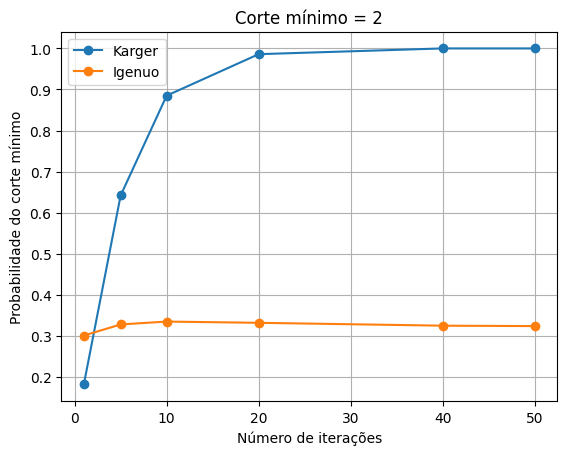

In [121]:
plt.plot(niteraction, probabilidadeKarger, marker='o',label='Karger')
plt.plot(niteraction, probabilidadeIgenuo, marker='o',label='Igenuo')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade do corte mínimo')
plt.title(f'Corte mínimo = {minimo}')
plt.grid(True)
plt.legend()
plt.show()